# INFORME SPECKLE


## Semana del 29/03

Según lo discutido el martes 29, tenía pendiente:
- Tomar nuevas fotos a la dispersión del difusor, agregando un filtro a fuentes parásitas. El montaje era el siguiente: fuente colimada, difusor,  lamina de $\lambda/2$, polarizador lineal y cámara lo más próxima al polarizador. La idea era que la lámina retardadora cambiara la dirección de la polarización $\pi/2$ y el polarizador solo dejara pasar esa dirección, reduciendo fuentes parásitas.
- Frente a los resultados de las pruebas de hipótesis sobre el análisis estadísitico de las imágenes de la dispersión producida por los difusores, aún determinados en justificar que es un speckle completamente desarrollado y polarizado, el profe propuso cambiar la imaggen sobre la que se hacía el análisis, de modo que construyéramos una nueva imagen que tomara el valor promedio de una submatriz de $n\times n$, cuyo tamaño estuviera dado por el ancho en que la función de autocorrelación cae de su valor máximo a la mitad de ese valor. Bajo este análisis obtendríamos una matriz de $1024/3 \times 1280/3$ para aplicar los métodos de pruebas de hipótesis.

### Nuevas fotos

Después de hacer el montaje, saqué estas dos fotos:


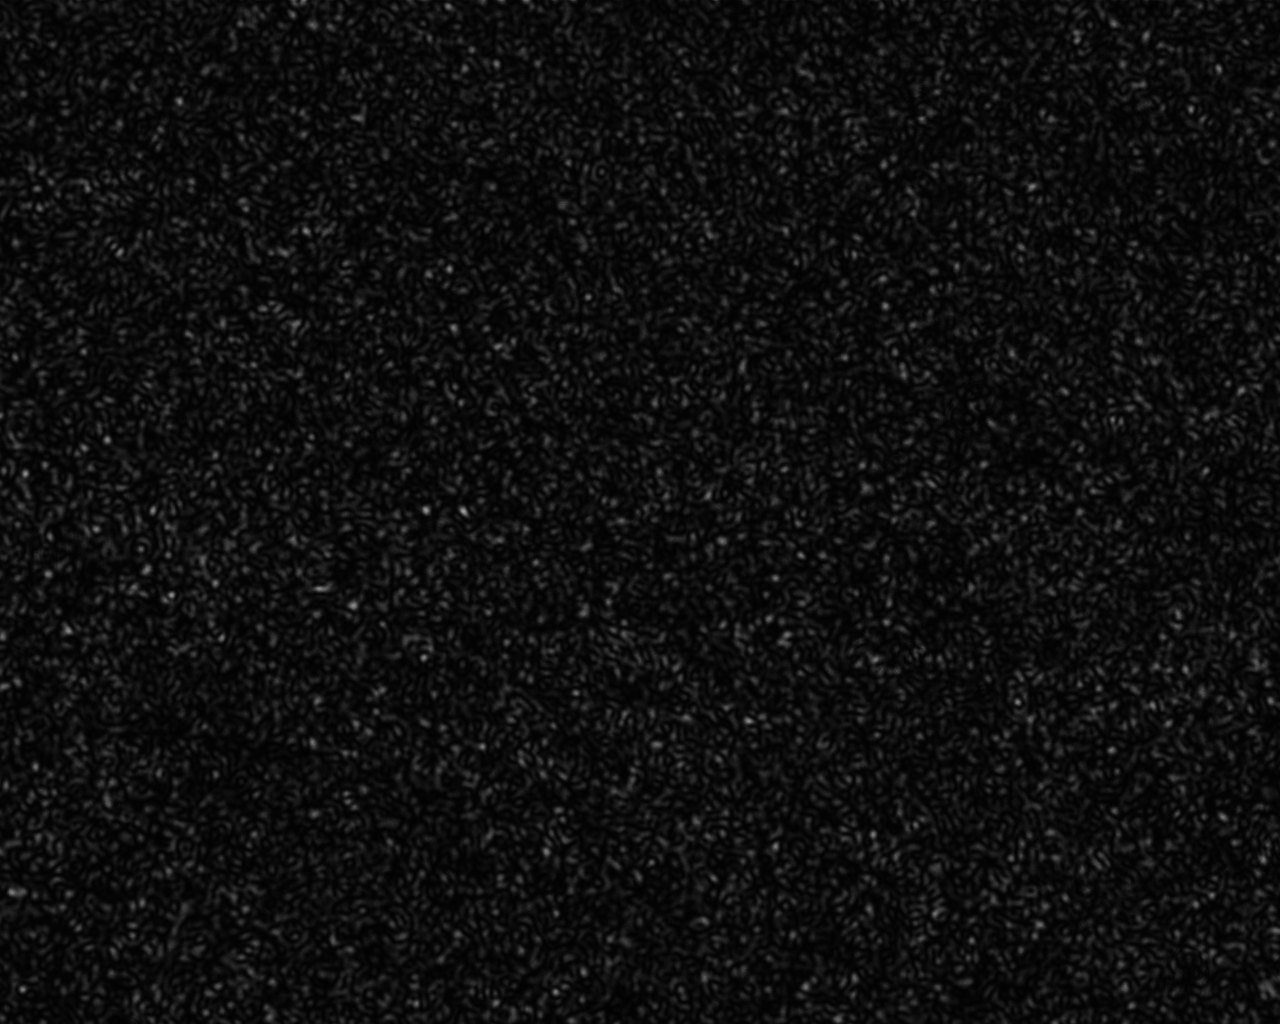

In [7]:
from PIL import Image

im = Image.open('images/4-150-l.tif')
display(im)

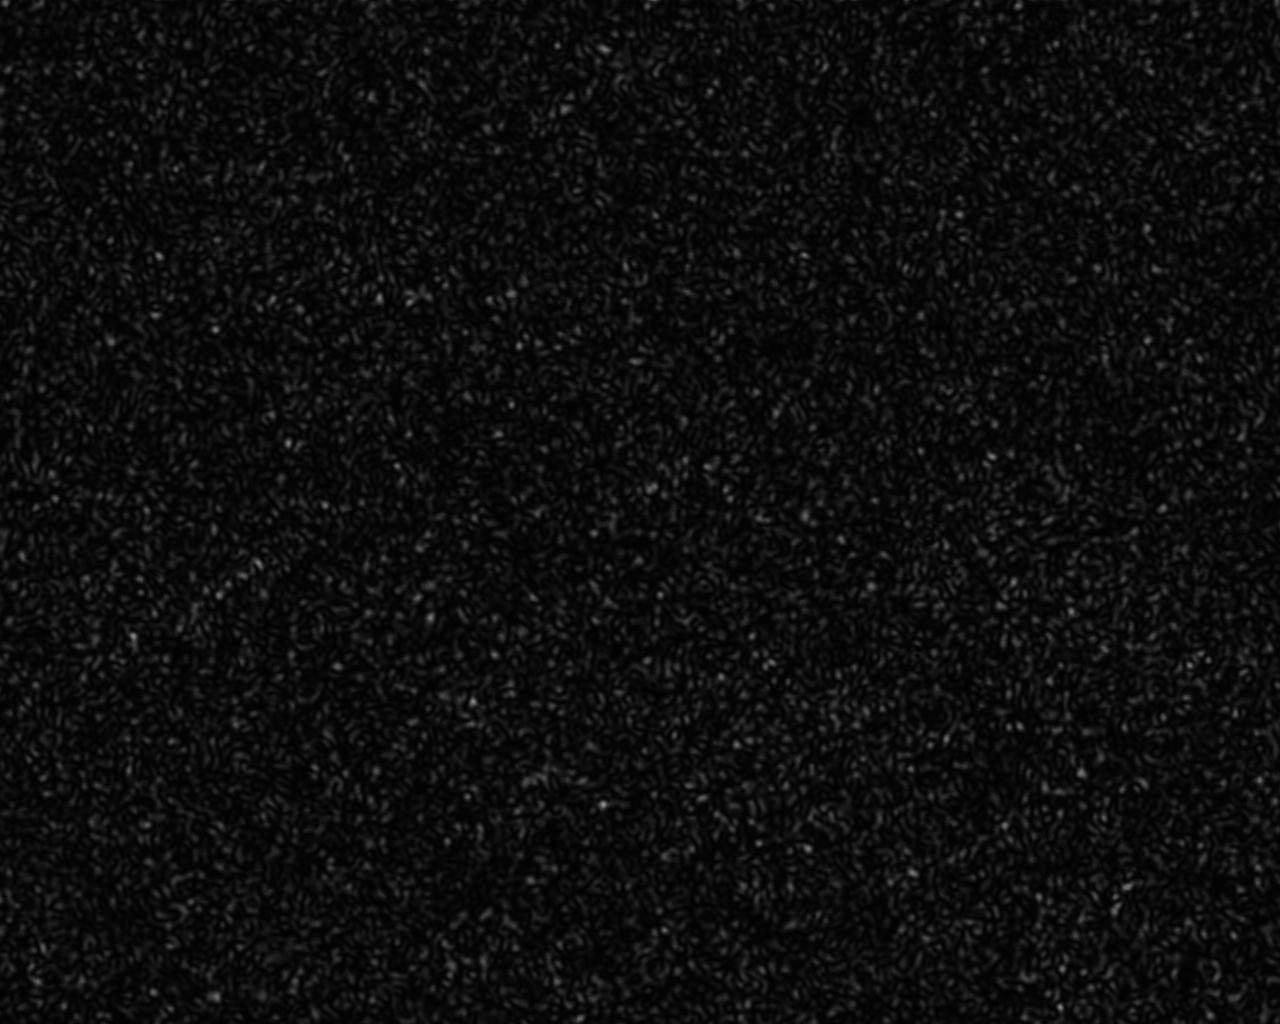

In [8]:
im = Image.open('images/3-16-l.tif')
display(im)

Ambos parecen como un speckle completamente desarrollado, pero todavía no hay 0's, en lo mostrado en el histograma de la cámara.

### Reescalado

Empecé aplicando las funciones que ya teníamos a una de las nuevas imágenes:

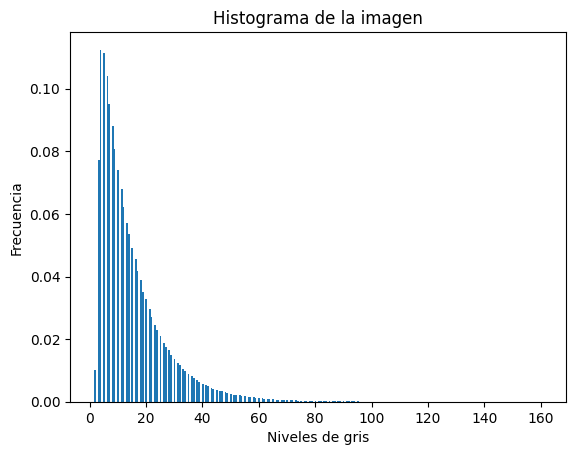

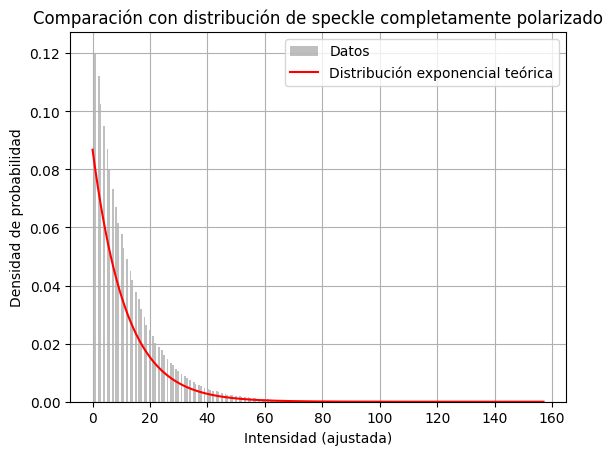

In [5]:
import PropsSpeckle as ps

speckle = ps.PropsSpeckle()
speckle.imagen('4-150-l.tif',show=False)
speckle.histograma()
speckle.modificar()

Si bien parecía seguir una exponencial negativa a simple vista, tanto la imagen original, como la modificada se alejan bastante de la curva teórica

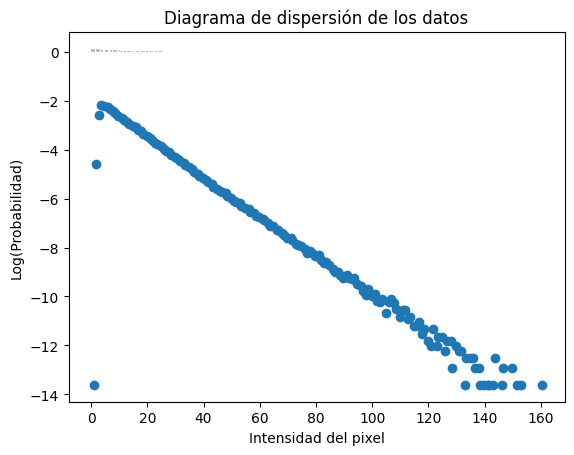

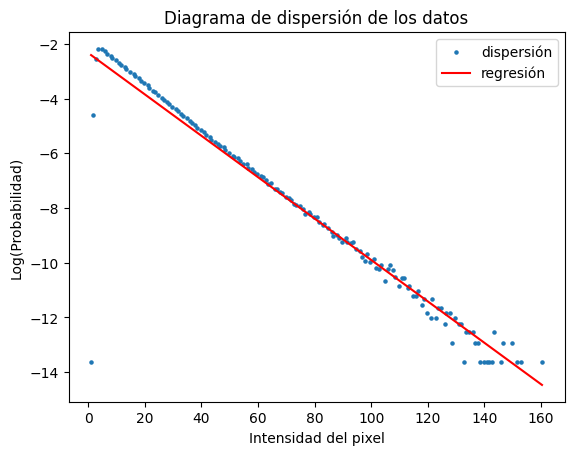

t estadístico: -4.464068809565615
Pendiente (b): -0.0756611856918097
Intercepto (a): -2.3339162900162878
Error estándar de la pendiente: 0.0018490369250549069
Valor p (para H0: pendiente = 0): 1.4003084634676294e-82
Coeficiente de correlación r: -0.9585341448566623
Valor teórico de la pendiente: -0.06740695762693691
Valor de la pendiente: -0.0756611856918097
Valor del estadístico t: -4.464068809565651
Intervalo de aceptación (al 90%): (np.float64(-1.655214506175987), np.float64(1.6552145061759864))
Rechazamos H₀: la pendiente difiere de -1/μ


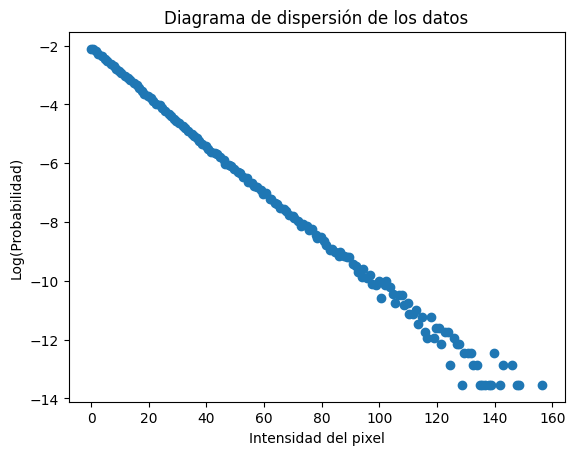

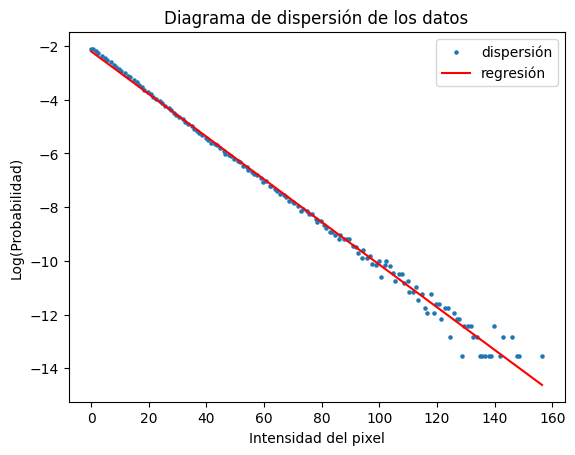

t estadístico: 15.20009647095102
Pendiente (b): -0.07943241288934591
Intercepto (a): -2.1997548700842477
Error estándar de la pendiente: 0.00048325848669046037
Valor p (para H0: pendiente = 0): 1.144590307162566e-166
Coeficiente de correlación r: -0.9973272544345665
Valor teórico de la pendiente: -0.08677798850744532
Valor de la pendiente: -0.07943241288934591
Valor del estadístico t: 15.200096470948154
Intervalo de aceptación (al 90%): (np.float64(-1.6554302514146273), np.float64(1.6554302514146266))
Rechazamos H₀: la pendiente difiere de -1/μ


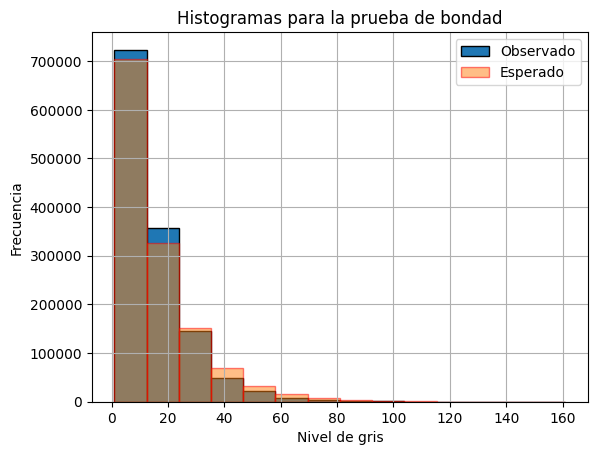

media = 14.84
El valor de chi2 es 20367.75 y el valor p es 0.0 %. El número de intervalos es 14


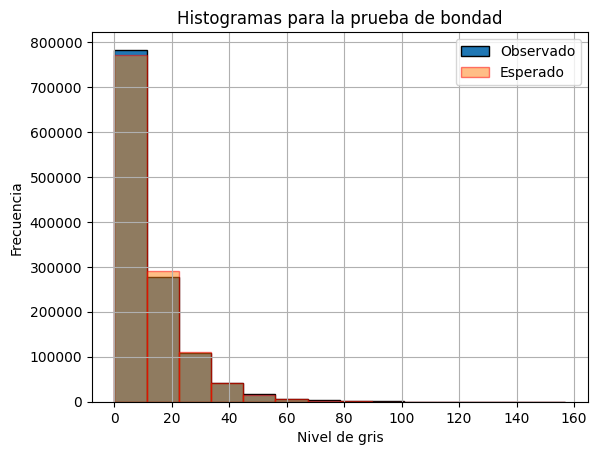

media = 11.52
El valor de chi2 es 1981.57 y el valor p es 0.0 %. El número de intervalos es 14


In [6]:
import PropsSpeckle as ps

speckle = ps.PropsSpeckle()
speckle.imagen('4-150-l.tif',show=False)
speckle.modificar(show=False)
speckle.prueba(imagen='o')
speckle.prueba(imagen='m')
speckle.pruebaBondad(imagen='o')
speckle.pruebaBondad(imagen='m')

Las pruebas de hipótesis sobre las nuevas imágenes están un poco más alejadas que las anteriores (lo digo por los valores de t y de chi), también se rechazan.

Algo que no deja de parecerme curioso es que en las imágenes linealizadas presentadas en la referencia Cabezas (2015) ninguna tiene esa "dispersión" (ese cono) de los valores de intensidad grande, son "curvas" donde distintos valores de intensidad tienen distintos conteos, es impresionante. Nuestros difusores no alcanzan eso, creo que porque en los valores más grandes de intesidad (así como en los más pequeños) se presentan esos saltos térmicos y esas variaciones de intensidad. Para mi estimado lector, ¿Es posible que también sea porque el tiempo de exposición es el mínimo de la cámara? (pero eso debería reducir el ruido, ¿no?).

#### Después de crear la función filtro.

Con la función "uniform_filter" de scipy pude aplicar el método de construir una nueva matriz con los promediados de una submatriz centrada en cada píxel; esta función entrega una matriz con el tamaño de la original, así que de la construida tomé píxeles de a saltitos del valor del tamaño de la submatriz de promedios y con esa es la que llamo .filtrada

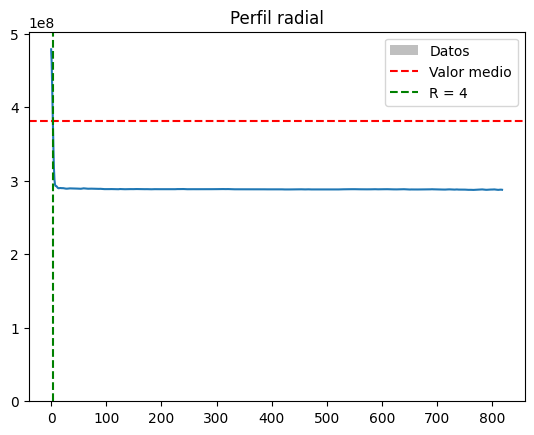

La intensidad cae al valor medio entre máximo y mínimo en un radio de 4 píxeles.


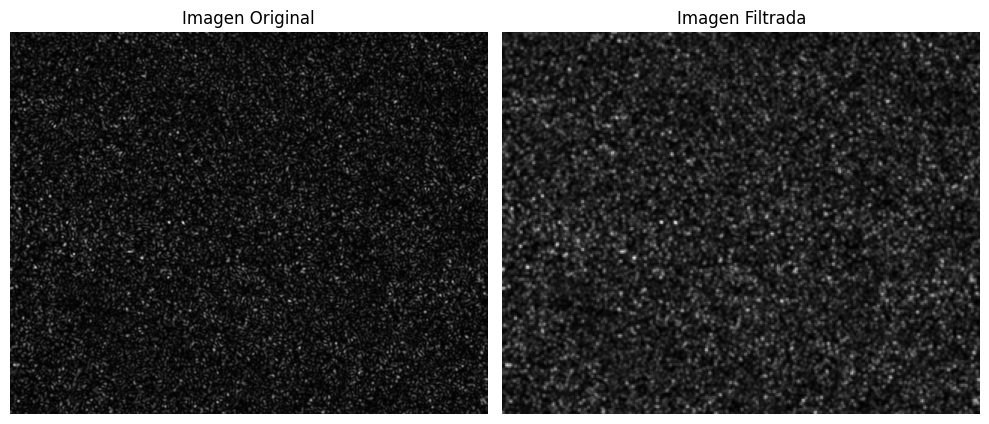

In [11]:
import PropsSpeckle as ps
import matplotlib.pyplot as plt

speckle = ps.PropsSpeckle()
speckle.imagen('4-150-l.tif',show=False)
speckle.modificar(show=False)
speckle.filtro(show=False)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(speckle.spec, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(speckle.filtrada, cmap='gray')
plt.title('Imagen Filtrada')
plt.axis('off')
plt.tight_layout()
plt.show()


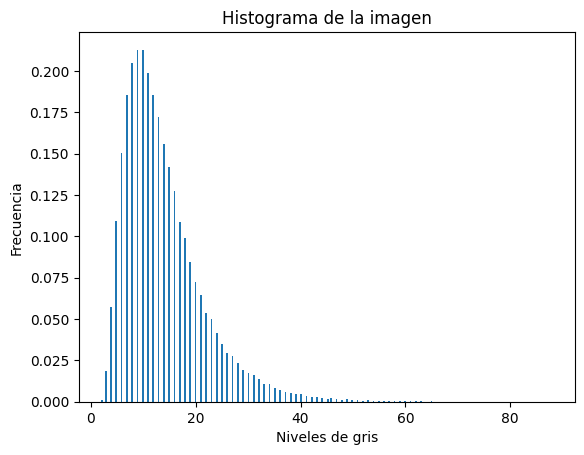

c:\Proyectos\Speckle\PropsSpeckle.py:439: RuntimeWarning: divide by zero encountered in log
  Y = np.log(p_x) #Variable lineal


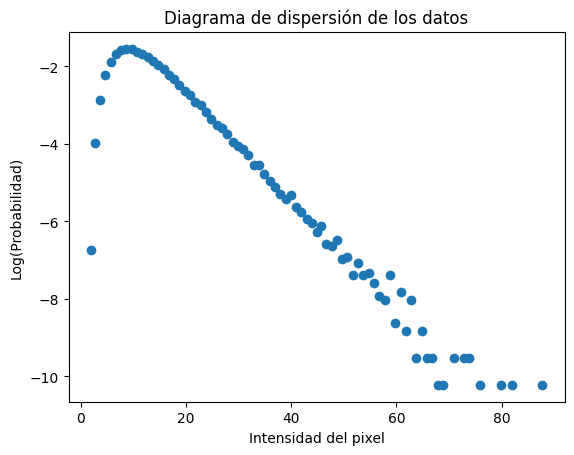

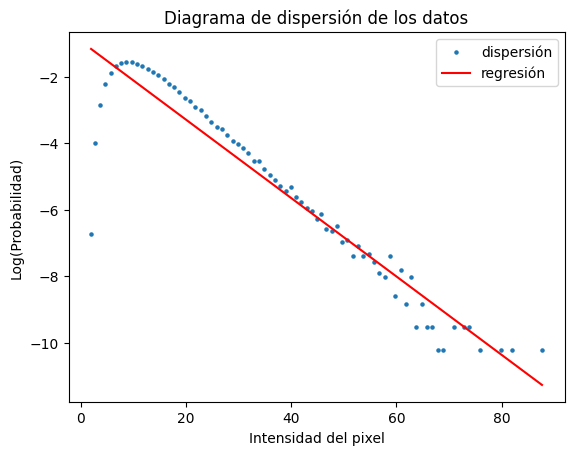

t estadístico: -10.058357369008617
Pendiente (b): -0.11797114711256348
Intercepto (a): -0.9309724619999571
Error estándar de la pendiente: 0.004606238588140921
Valor p (para H0: pendiente = 0): 3.267939519308477e-38
Coeficiente de correlación r: -0.9486060664150835
Valor teórico de la pendiente: -0.07163995326612423
Valor de la pendiente: -0.11797114711256348
Valor del estadístico t: -10.058357369008656
Intervalo de aceptación (al 90%): (np.float64(-1.6659962237714323), np.float64(1.6659962237714314))
Rechazamos H₀: la pendiente difiere de -1/μ


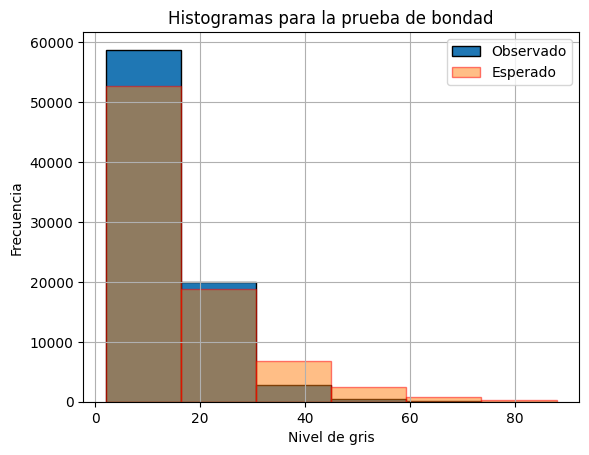

media = 13.96
El valor de chi2 es 5944.99 y el valor p es 0.0 %. El número de intervalos es 6


In [13]:
speckle.histograma(imagen='f')
speckle.prueba(imagen='f')
speckle.pruebaBondad(imagen='f')

No lo había pensado hasta que vi el histograma, luego me pareció bastante obvio, si antes no teníamos 0's, ahora sí que nos íbamos a alejar bastante de este valor, y de la exponencial negativa. Así que, naturalmente, las pruebas de hipótesis también se rechazan

Me pregunto si está justificado aplicar la modificación de mover el 0 en la imagen filtrada, pero siento que ya es jugar mucho con los datos, además que la curva del histograma es bastante suave, lo que no lo hace tan natural, como en las originales